D:\Data\raw\3198-51\51_naive
D:\Data\raw\3198-51\51_recall
D:\Data\raw\3198-52\52_naive
D:\Data\raw\3198-52\52_recall
D:\Data\raw\3556-17\17_naive
D:\Data\raw\3556-17\17_recall
D:\Data\raw\7633_naive
D:\Data\raw\7633_recall
D:\Data\raw\7644_naive
D:\Data\raw\7644_recall
SpikeGLXRecordingExtractor: 9 channels - 11573.700000 Hz - 1 segments - 52,998,637 samples 
                            4,579.23s (1.27 hours) - int16 dtype - 909.78 MiB
SpikeGLXRecordingExtractor: 9 channels - 11573.700000 Hz - 1 segments - 53,366,894 samples 
                            4,611.05s (1.28 hours) - int16 dtype - 916.10 MiB
SpikeGLXRecordingExtractor: 9 channels - 11573.700000 Hz - 1 segments - 52,673,563 samples 
                            4,551.14s (1.26 hours) - int16 dtype - 904.20 MiB
SpikeGLXRecordingExtractor: 9 channels - 11573.700000 Hz - 1 segments - 51,194,937 samples 
                            4,423.39s (1.23 hours) - int16 dtype - 878.82 MiB
SpikeGLXRecordingExtractor: 9 channels - 11573.70

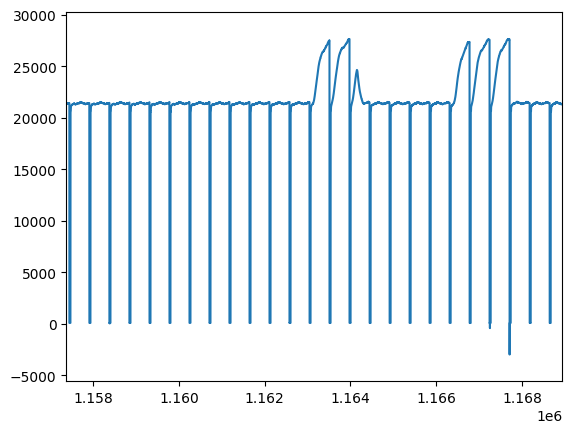

In [1]:
from pathlib import Path

base_dir = Path(r"D:/Data/raw")
pattern = "*_t0.nidq.meta"

folders = sorted({p.parent for p in base_dir.rglob(pattern)})
# Explanation: 
#   p.parent      -> folder containing the .meta file
#   p.parent.parent -> one level up (e.g. D:\Data\7633_naive)

for f in folders:
    print(f)

import spikeinterface.full as si
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
import pandas as pd 
import os, sys
import shutil
from pprint import pprint 
import time as time

from scipy.signal import medfilt
from scipy.interpolate import interp1d


def extract_ttl_edges_auto(signal, fs, hysteresis=0.1):
    """Detect TTL edges robustly from analog signal using percentile-based thresholds."""
    signal_f = medfilt(signal, kernel_size=5)
    
    v_low = np.percentile(signal_f, 5)   # bottom 5% of values
    v_high = np.percentile(signal_f, 95) # top 5% of values
    
    v_mid_low = v_low + hysteresis * (v_high - v_low)
    v_mid_high = v_high - hysteresis * (v_high - v_low)

    digital = np.zeros_like(signal_f, dtype=int)
    state = 0
    for i, v in enumerate(signal_f):
        if state == 0 and v > v_mid_high:
            state = 1
        elif state == 1 and v < v_mid_low:
            state = 0
        digital[i] = state

    return digital


tlist = []
flist = []
for f in folders:
    basefolder = f
    base_path = Path(basefolder)
    event =  si.read_spikeglx(basefolder, stream_id='nidq', load_sync_channel=False)
    print(event)
    fs = event.get_sampling_frequency()
    signal = event.get_traces(channel_ids=[event.get_channel_ids()[3]]).squeeze()
    digA =  extract_ttl_edges_auto(signal, fs, hysteresis=0.1)
    falling_A = np.where((digA[1:] < digA[:-1]) & (digA[:-1] == 1))[0] + 1
    t_edges = falling_A / fs
    t_first = t_edges[0]
    tlist.append(t_first)
    folder_name = Path(basefolder).name
    flist.append(folder_name)

df = pd.DataFrame({
    'name': flist,
    'start': tlist
    })
    
plt.plot(signal)
plt.xlim(100*fs,101*fs)
plt.show()

In [3]:
df.to_csv('D:/Data/speeds/first_camttl.csv',index=False)

C:\Users\Freitag\AppData\Local\Temp\ipykernel_10836\3193953579.py:17: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, header=None)  # Load without header to treat all rows equally


Processed and saved: D:\pupiltrack\try\51_recallDLC_Resnet101_MousePupilAug2shuffle1_snapshot_best-10.csv
